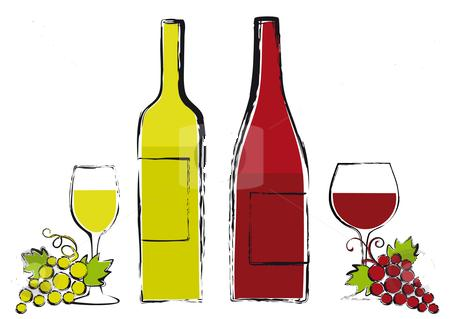
> **In this note book i will explore the wine tasting data base and try to predict quality**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [ ]:
dataset = pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
data = dataset.copy()

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
data.isnull().values.any()

In [ ]:
#checking for duplicate rows as many wines are common

duplicate_rows_df = data[data.duplicated()]
print(" number of duplicate rows: ", duplicate_rows_df.shape )

We can see we have 240 rows that are duplicate

In [ ]:
data = data.drop_duplicates()
data.info()

In [ ]:
cols = data.columns.tolist()
#Checking for Detecting Outliers
plt.subplots(figsize=(20,15))
boxplot = data.boxplot(column=cols)

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
#removing Out liers 
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

In [ ]:
# after removing out liers
plt.subplots(figsize=(20,15))
boxplot = data.boxplot(column=cols)

In [ ]:
#normalising data
d = preprocessing.normalize(data, axis = 0)
scaled_df = pd.DataFrame(d, columns=cols)
scaled_df['quality'] = data['quality'].values
scaled_df.head(20)

In [ ]:
data = scaled_df

In [ ]:
plt.subplots(figsize=(20,15))
sn.heatmap(data.corr(), annot=True )

**As we can see Volatile acidity, alchol, citric acid etc seem to play a lot of role in determining quality**

I am using KNN as to me it makes the most sense.

In [ ]:
dataset_knn = data.copy()

AS quality is not obejective truth we can have something like quality >6 is good and less is bad

In [ ]:
wine_cat=[]
for i in dataset_knn["quality"]:
    if i >=7:
        wine_cat.append(1)
    else:
        wine_cat.append(0)
dataset_knn["wine_cat"]=wine_cat

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
df_Predictors=dataset_knn.drop(["quality","wine_cat"],axis=1)
df_target=dataset_knn.wine_cat

In [ ]:
Xtrain,Xtest,ytrain,ytest=train_test_split(df_Predictors,df_target,random_state=10,test_size=0.2)
print("Shape of Xtrain:{} and Shape of ytrain:{} ".format(Xtrain.shape,ytrain.shape))
print("Shape of Xtest:{} and Shape of ytest:{} ".format(Xtest.shape,ytest.shape))

In [ ]:

KNN=KNeighborsClassifier(n_neighbors=4)
KNN=KNN.fit(Xtrain,ytrain)
Knn_predict=KNN.predict(Xtest)

In [ ]:
metrics.accuracy_score(ytest,Knn_predict)

Trying hypertuning

In [ ]:
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
model1.fit(Xtrain,ytrain)
#The best hyper parameters set
print("Best Hyper Parameters:",model1.best_params_)

In [ ]:
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
knn_hy=model1.predict(Xtest)

In [ ]:
metrics.accuracy_score(ytest,knn_hy)

maybe the hypertune model is overfitting thats why it is producing worse results.
